In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [4]:
def my_random():
    number = np.random.normal(0.5, 0.5, 1)
    if number < 0:
        return 0
    elif number > 1:
        return 1
    else:
        return number

In [5]:
def calculate_true_risk(m):
    # generate training set
    training_set = []
    for x in xrange(0, m):
        training_set.append((my_random(), my_random()))

    # calculate true risk
    max_x, max_y, min_x, min_y = 0, 0, 1, 1
    for elem in training_set:
        if elem[0] <= math.sqrt(1.0 / 2):
            max_x = max(max_x, elem[0])
            min_x = min(min_x, elem[0])
        # if elem[1] <= math.sqrt(1.0 / 2):
        #     max_y = max(max_y, elem[1])
        #     min_y = min(min_y, elem[1])

    return  math.sqrt(1.0 / 2) - ((max_x - min_x) ) / 1.0

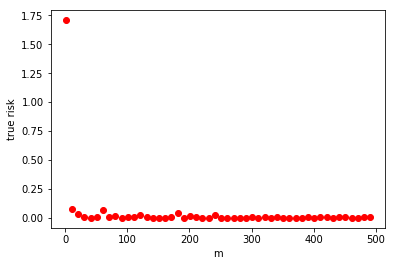

In [6]:
plt.xlabel('m')
plt.ylabel('true risk')
for m in xrange(1, 500, 10):
    true_risk = calculate_true_risk(m)
    plt.plot(m, true_risk, 'ro')
plt.show()

In [12]:
# coding=utf-8
# calculate average m for true risk
attempts_count = 200
attempts_map = {0.1: [], 0.01: [], 0.001: []}
for i in xrange(0, attempts_count):
    true_risk = 1.0
    m = 1
    first_experiment_calculated = False
    second_experiment_calculated = False
    while true_risk > 0.001:
        true_risk = calculate_true_risk(m)
        if true_risk < 0.1 and not first_experiment_calculated:
            first_experiment_calculated = True
            attempts_map[0.1].append(m)
        if true_risk < 0.01 and not second_experiment_calculated:
            second_experiment_calculated = True
            attempts_map[0.01].append(m)
        if true_risk < 0.001:
            attempts_map[0.001].append(m)
            break
        m += 1


print 'Средний размер выборки, чтобы true risk был 10%: ' + str(sum(attempts_map[0.1]) / len(attempts_map[0.1]))
print 'Средний размер выборки, чтобы true risk был 1%: ' + str(sum(attempts_map[0.01]) / len(attempts_map[0.01]))
print 'Средний размер выборки, чтобы true risk был 0.1%: ' + str(sum(attempts_map[0.001]) / len(attempts_map[0.001]))

Средний размер выборки, чтобы true risk был 10%: 6
Средний размер выборки, чтобы true risk был 1%: 16
Средний размер выборки, чтобы true risk был 0.1%: 45
